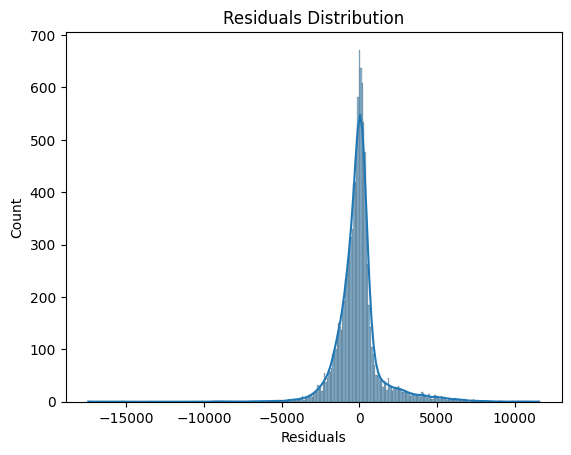

In [3]:
# Practical 1: Visualize Residuals for Multiple Linear Regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
df = sns.load_dataset('diamonds')
df = df.dropna()
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

In [4]:
# Practical 2: Calculate MSE, MAE, RMSE
from sklearn.metrics import mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

MSE: 2242178.9040856035, MAE: 888.4808633901026, RMSE: 1497.3906985438382


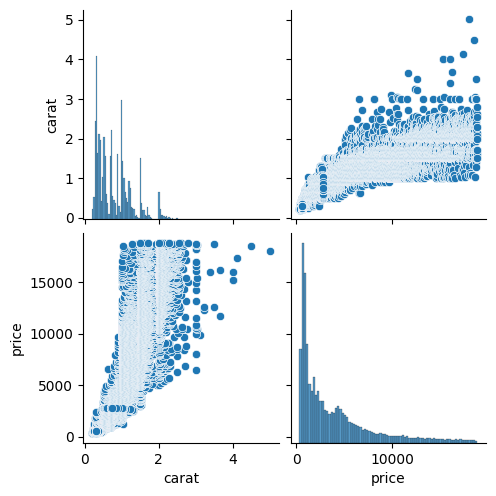

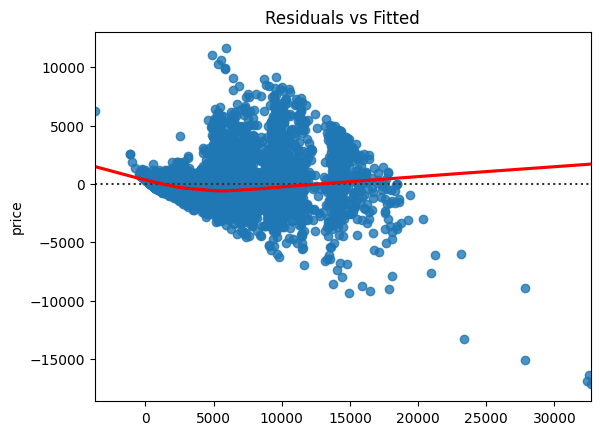

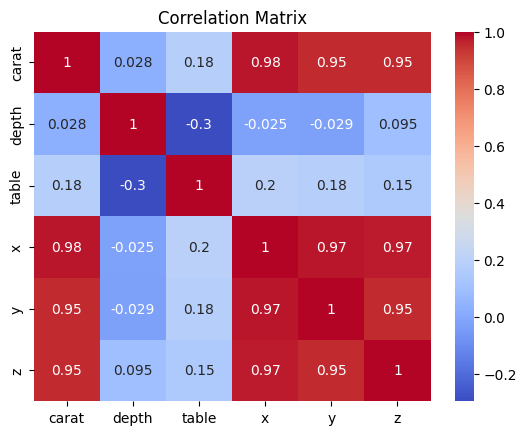

In [5]:

# Practical 3: Check Assumptions of Linear Regression
sns.pairplot(df[['carat', 'price']])  # Linearity
plt.show()

sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})  # Homoscedasticity
plt.title("Residuals vs Fitted")
plt.show()

sns.heatmap(X.corr(), annot=True, cmap='coolwarm')  # Multicollinearity
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Practical 4: ML Pipeline with Feature Scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])
pipeline.fit(X_train, y_train)
r2_score = pipeline.score(X_test, y_test)
print(f"Pipeline R-squared: {r2_score}")


Pipeline R-squared: 0.8794177662487052


In [7]:
# Practical 5: Simple Linear Regression Coefficients and R-squared
simple_model = LinearRegression()
simple_model.fit(X_train[['carat']], y_train)
print(f"Coefficient: {simple_model.coef_}, Intercept: {simple_model.intercept_}, R-squared: {simple_model.score(X_test[['carat']], y_test)}")




Coefficient: [7768.91049036], Intercept: -2261.9117456492177, R-squared: 0.8489390686155808


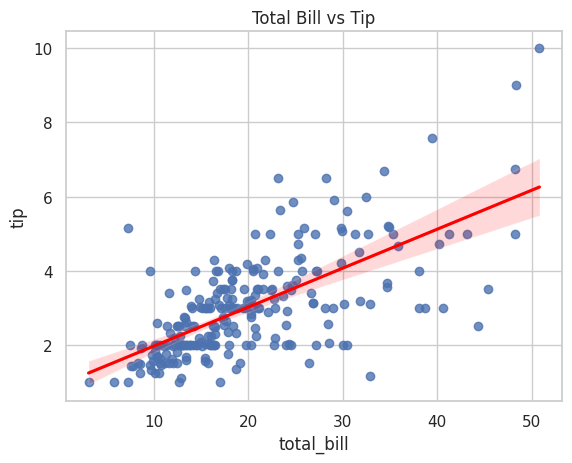

In [8]:
# Practical 6: Analyze Tips Dataset
sns.set(style="whitegrid")
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']
model = LinearRegression()
model.fit(X, y)
sns.regplot(x='total_bill', y='tip', data=tips, line_kws={'color': 'red'})
plt.title("Total Bill vs Tip")
plt.show()



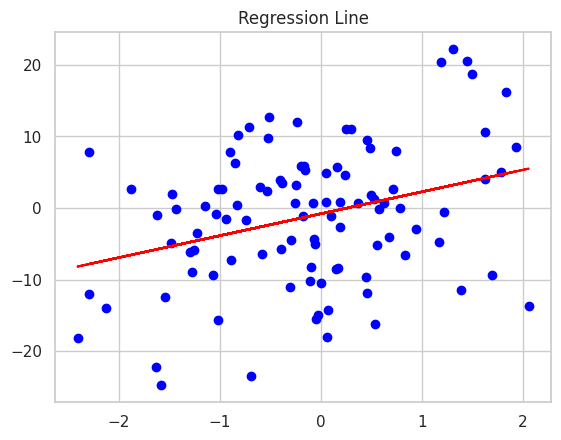

In [9]:
# Practical 7: Synthetic Data and Regression Line
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Regression Line")
plt.show()



In [10]:
# Practical 8: Save Model with Pickle
import pickle

with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)



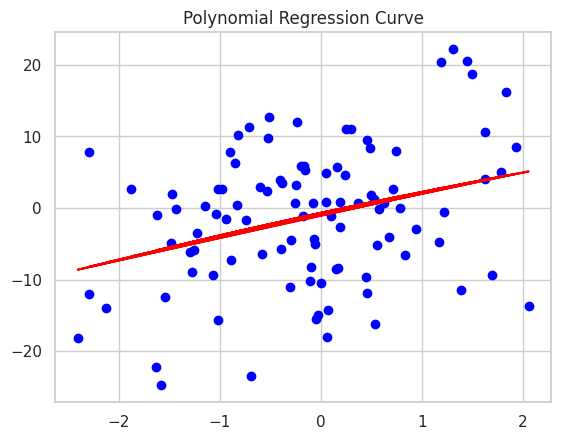

In [11]:
# Practical 9: Polynomial Regression Curve
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression Curve")
plt.show()



In [12]:
# Practical 10: Synthetic Data for Simple Linear Regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")





Coefficient: [86.59324617], Intercept: 0.46688077439267683


In [13]:
# Practical 11: Compare Polynomial Regression Models
degrees = [1, 2, 3]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    print(f"Degree {degree}, R-squared: {model.score(X_poly, y)}")



Degree 1, R-squared: 0.9895331724009288
Degree 2, R-squared: 0.9895857681550397
Degree 3, R-squared: 0.9896062455071503


In [14]:
# Practical 12: Simple Linear Regression with Two Features
X, y = make_regression(n_samples=100, n_features=2, noise=10)
model = LinearRegression()
model.fit(X, y)
print(f"Coefficients: {model.coef_}, Intercept: {model.intercept_}, R-squared: {model.score(X, y)}")




Coefficients: [53.00218957 89.64242423], Intercept: -0.18060580832199324, R-squared: 0.9927431047934402


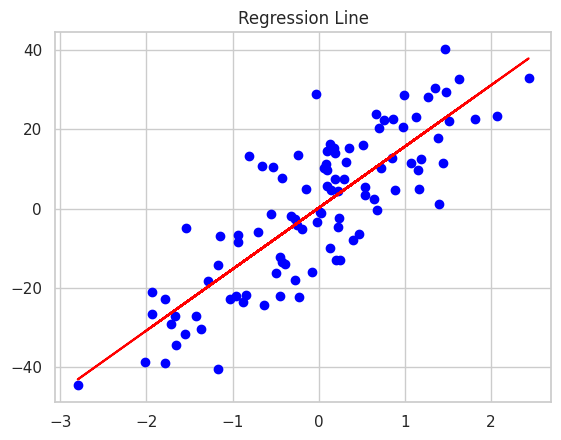

In [15]:
# Practical 13: Linear Regression Line Visualization
X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Regression Line")
plt.show()




In [16]:
# Practical 14: Check Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X, y = make_regression(n_samples=100, n_features=3, noise=10)
vif_data = pd.DataFrame()
vif_data["feature"] = [f"X{i}" for i in range(X.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)



  feature       VIF
0      X0  1.012437
1      X1  1.006293
2      X2  1.016548


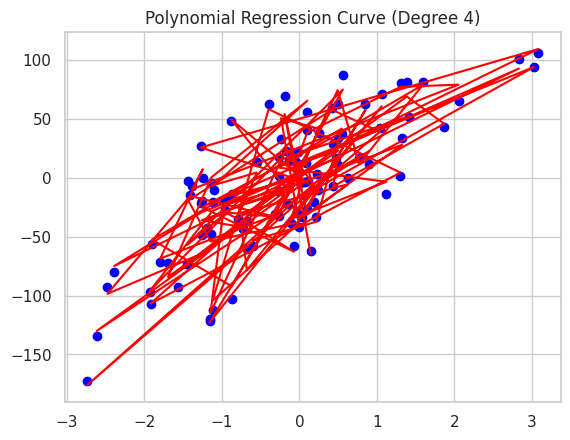

In [17]:
# Practical 15: Polynomial Regression (Degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
plt.scatter(X[:, 0], y, color='blue')
plt.plot(X[:, 0], model.predict(X_poly), color='red')
plt.title("Polynomial Regression Curve (Degree 4)")
plt.show()



In [18]:
# Practical 16: ML Pipeline with Standardization and Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X, y)
print(f"R-squared: {pipeline.score(X, y)}")




R-squared: 0.9688189175100008


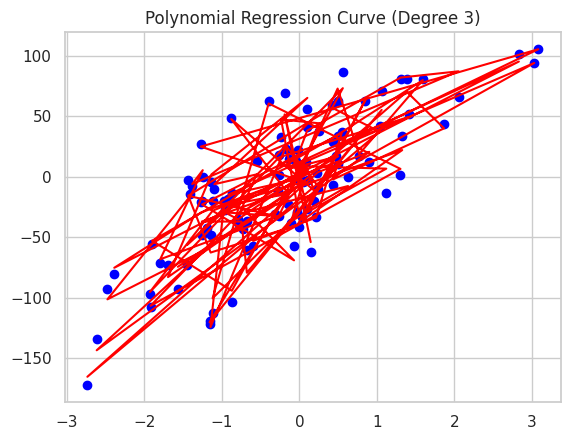

In [19]:
# Practical 17: Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
plt.scatter(X[:, 0], y, color='blue')
plt.plot(X[:, 0], model.predict(X_poly), color='red')
plt.title("Polynomial Regression Curve (Degree 3)")
plt.show()





In [20]:
# Practical 18: Multiple Linear Regression with 5 Features
X, y = make_regression(n_samples=100, n_features=5, noise=10)
model = LinearRegression()
model.fit(X, y)
print(f"Coefficients: {model.coef_}, R-squared: {model.score(X, y)}")





Coefficients: [21.96570392 56.71922943 51.14246777 67.61546447 95.67186322], R-squared: 0.993785730245186


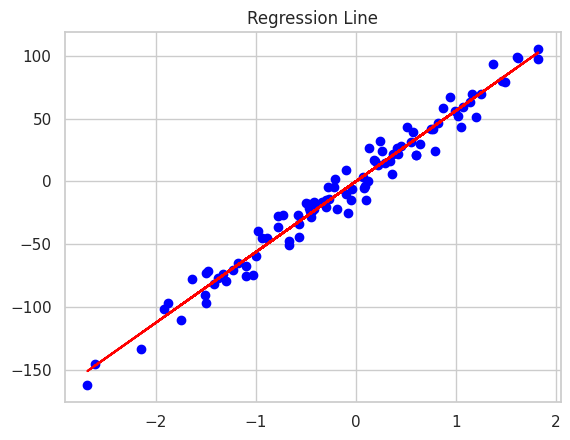

In [21]:
# Practical 19: Synthetic Data Visualization with Regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Regression Line")
plt.show()




In [22]:
# Practical 20: Multiple Linear Regression with 3 Features
X, y = make_regression(n_samples=100, n_features=3, noise=10)
model = LinearRegression()
model.fit(X, y)
print(f"Coefficients: {model.coef_}, R-squared: {model.score(X, y)}")




Coefficients: [58.5432375  56.39198228 63.06332016], R-squared: 0.9931530213024942


In [23]:
# Practical 21: Serialize and Deserialize with Joblib
from joblib import dump, load

dump(model, 'linear_model.joblib')
loaded_model = load('linear_model.joblib')
print(f"Loaded model R-squared: {loaded_model.score(X, y)}")





Loaded model R-squared: 0.9931530213024942


In [24]:
# Practical 22: Linear Regression with Categorical Features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

tips = sns.load_dataset('tips')
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time'])],
    remainder='passthrough'
)
X_transformed = preprocessor.fit_transform(X)
model = LinearRegression()
model.fit(X_transformed, y)
print(f"R-squared: {model.score(X_transformed, y)}")




R-squared: 0.4613641828591971


In [31]:
# Practical 23: Ridge vs Linear Regression
from sklearn.linear_model import Ridge

# Assuming X and y are already defined and preprocessed
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_transformed, y)
print(f"Ridge Coefficients: {ridge_model.coef_}, R-squared: {ridge_model.score(X_transformed, y)}")

linear_model = LinearRegression()
linear_model.fit(X_transformed, y)
print(f"Linear Coefficients: {linear_model.coef_}, R-squared: {linear_model.score(X_transformed, y)}")



Ridge Coefficients: [-0.03683122 -0.13705348 -0.07982753  0.04935777 -0.14124394  0.09891774
  0.10582676], R-squared: 0.4613451210778474
Linear Coefficients: [-0.03762835 -0.14177083 -0.0790927   0.05053201 -0.17570241  0.13242948
  0.10592726], R-squared: 0.4613641828591971


In [32]:

# Practical 24: Cross-Validation for Linear Regression
from sklearn.model_selection import cross_val_score

# Assuming X_transformed and y are defined
scores = cross_val_score(LinearRegression(), X_transformed, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {scores}, Mean: {scores.mean()}")



Cross-Validation R-squared Scores: [0.55090758 0.61079746 0.38729345 0.18984432 0.38449051], Mean: 0.42466666201344705


In [35]:
#Questions



1. **Visualize Residuals (Seaborn "diamonds" dataset)**  
   Use Seaborn's residual plot to show the distribution of errors after fitting a multiple linear regression model.  

2. **Calculate MSE, MAE, RMSE**  
   Use `mean_squared_error`, `mean_absolute_error`, and `np.sqrt()` to compute and print these metrics.  

3. **Check Assumptions of Linear Regression**  
   Use scatter plots for linearity, residual plots for homoscedasticity, and `sns.heatmap()` for correlation matrix.  

4. **Machine Learning Pipeline with Feature Scaling**  
   Create a pipeline with `StandardScaler` and regression models to compare their performance.  

5. **Simple Linear Regression Model**  
   Fit a linear model to a dataset, print coefficients, intercept, and \( R^2 \) using `LinearRegression` from scikit-learn.  

6. **Analyze Tips Dataset**  
   Perform simple linear regression on "total_bill" and "tip" from the Seaborn "tips" dataset and plot the results.  

7. **Synthetic Data and Regression Line**  
   Generate synthetic data, fit a linear model, and plot the regression line with data points.  

8. **Save Model with Pickle**  
   Serialize a trained linear regression model using `pickle` and save it to a file.  

9. **Polynomial Regression Curve**  
   Fit a degree-2 polynomial regression model and plot the resulting curve.  

10. **Synthetic Data for Simple Linear Regression**  
    Generate \( X \) and \( y \), fit a model, and print its coefficient and intercept.  

11. **Compare Polynomial Models**  
    Fit polynomial models of varying degrees, compute \( R^2 \) scores, and compare performances.  

12. **Linear Regression with Two Features**  
    Fit a simple regression model with two features, print coefficients, intercept, and \( R^2 \).  

13. **Visualize Regression Line**  
    Generate synthetic data, fit a linear regression model, and plot the regression line.  

14. **Check Multicollinearity (VIF)**  
    Use statsmodels’ VIF function to check multicollinearity in a dataset with multiple features.  

15. **Degree-4 Polynomial Regression**  
    Generate synthetic degree-4 data, fit a polynomial regression model, and plot the curve.  

16. **Pipeline with Standardization**  
    Create a pipeline with `StandardScaler` and multiple linear regression, printing the \( R^2 \).  

17. **Polynomial Regression (Degree 3)**  
    Perform degree-3 polynomial regression and plot the curve for synthetic data.  

18. **Multiple Regression (5 Features)**  
    Fit multiple linear regression on synthetic data with 5 features, print \( R^2 \) and coefficients.  

19. **Visualize Synthetic Linear Regression**  
    Generate data, fit a model, and plot the regression line with data points.  

20. **Multiple Regression with 3 Features**  
    Fit and evaluate multiple regression on synthetic data with 3 features.  

21. **Model Serialization with Joblib**  
    Demonstrate saving and loading models using `joblib`.  

22. **Regression with Categorical Features**  
    Use one-hot encoding for categorical variables in the "tips" dataset and perform linear regression.  

23. **Compare Ridge and Linear Regression**  
    Compare coefficients and \( R^2 \) scores of Ridge and Linear Regression models on synthetic data.  

24. **Cross-Validation with Linear Regression**  
    Evaluate a Linear Regression model using cross-validation on synthetic data.  

25. **Compare Polynomial Degrees**  
    Fit polynomial models of different degrees and print their \( R^2 \) scores.  